# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [301]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [302]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] numpy 1.21.2
[OK] mlxtend 0.23.1
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2
[OK] pandas 1.3.2


# Practice 1 - ...

### Overview

- [Important Code Snippets](#important-code-snippets)
    - [Image and Graph Display Settings](#image-and-graph-display-settings)
    - [Display an Image (Image() Function)](#display-an-image-image-function)
    - [Display a Centered Image (HTML)](#display-a-centered-image-html)
- [Section 1](#section-1)
- [Section 2](#section-2)
- [Section 3](#section-3)
- [Summary](#summary)
    - [Converting a Jupyter Notebook to a Python File (script located in the parent directory)](#converting-a-jupyter-notebook-to-a-python-file-script-located-in-the-parent-directory)
    - [Converting a Jupyter Notebook to a Python File (script located in the current directory)](#converting-a-jupyter-notebook-to-a-python-file-script-located-in-the-current-directory)

# Important Code Snippets

## Image and Graph Display Settings

In [303]:
from IPython.display import Image, display, HTML
%matplotlib inline

## Display an Image (Image() Function)

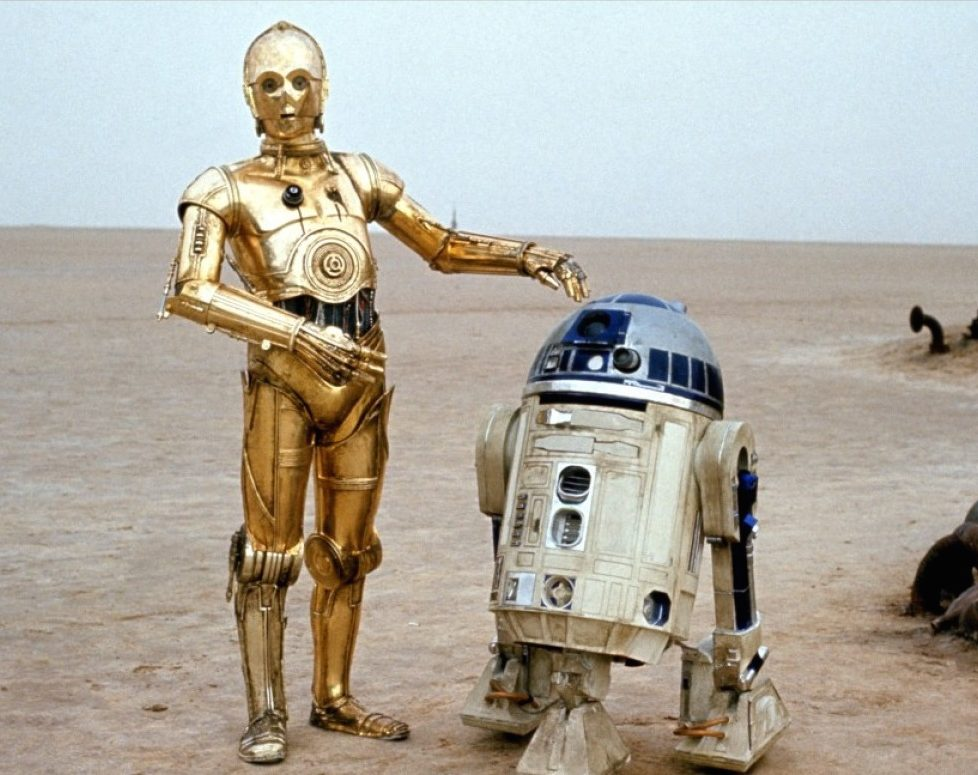

In [304]:
Image(filename='./figures/starwars.png', width=300, height=300, format="png")

## Display a Centered Image (HTML)

In [305]:
display(HTML(f'<div style="text-align: center;"> <img src="./figures/starwars.png" width="300" height="300" format="png"> </div>'))

# Data Analysis

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [307]:
dataset = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', len(dataset.columns))
dataset.head(1)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Target
0,0.34,0.9947,3.19,7.0,0.55,0.066,11.4,3.0,9.8,1.4,0.39,7


In [308]:
dataset.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Target'],
      dtype='object')

In [309]:
# ACCURACY (TODAS LAS CARACTERÍSTICAS)
# LOGISTIC REGRESSION: 0.588
# SVM: 0.608
# RANDOM TREES: 0.570

# ACCURACY (4 CARACTERÍSTICAS)
# LOGISTIC REGRESSION: 0.590
# SVM: 0.565
# RANDOM TREES: 0.565

# ACCURACY (2 CARACTERÍSTICAS)
# LOGISTIC REGRESSION: 0.583
# SVM: 0.583
# RANDOM TREES: 0.555

In [310]:
# TODAS LAS CARACTERÍSTICAS
dataset_anonymized = dataset.drop(["Target"], axis=1)
dataset_anonymized.to_csv('dataset_anonymized.csv', index=False)
dataset_anonymized.corr()

# 4 CARACTERÍSTICAS
# dataset_4_characteristics = dataset_anonymized.drop(["Col2", "Col3", "Col4", "Col6", "Col8", "Col9", "Col10"], axis=1)
# dataset_4_characteristics.to_csv('dataset_4_characteristics.csv', index=False)
# dataset_4_characteristics.corr()

# 2 CARACTERÍSTICAS
dataset_2_characteristics = dataset_anonymized.drop(["Col2", "Col3", "Col4", "Col5", "Col6", "Col8", "Col9", "Col10", "Col11"], axis=1)
dataset_2_characteristics.to_csv('dataset_2_characteristics.csv', index=False)
dataset_2_characteristics.corr()

,Col1,Col7
Col1,1.000000,-0.202288
Col7,-0.202288,1.000000


In [311]:
# TODAS LAS CARACTERÍSTICAS
# X = dataset_anonymized
# y = dataset.get("Target")
# print('Class labels:', np.unique(y))

# 4 CARACTERÍSTICAS
# X = dataset_4_characteristics
# y = dataset.get("Target")
# print('Class labels:', np.unique(y))

# 2 CARACTERÍSTICAS
X = dataset_2_characteristics
y = dataset.get("Target")
print('Class labels:', np.unique(y))

Class labels: [3 4 5 6 7 8]


<AxesSubplot:>

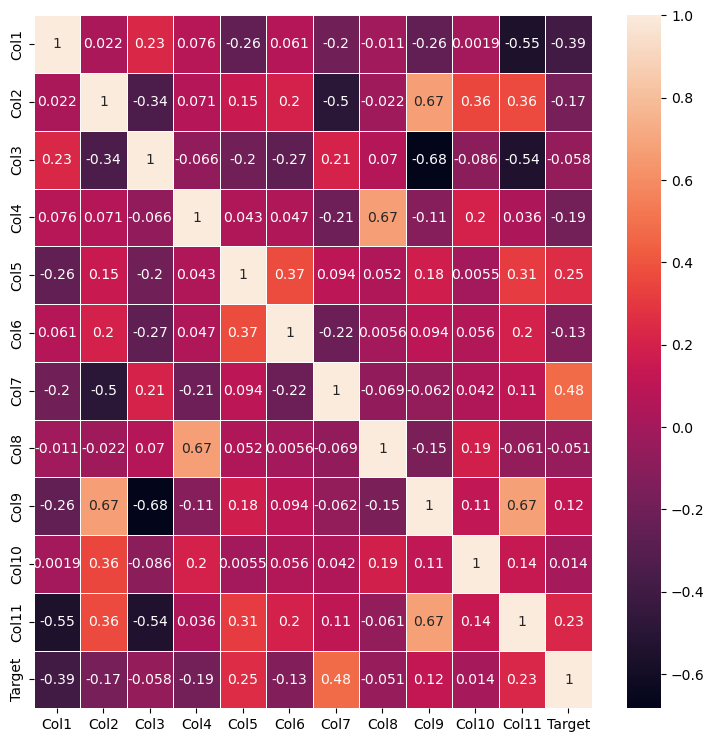

In [312]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(dataset.corr(), linewidth = 0.5, annot=True)

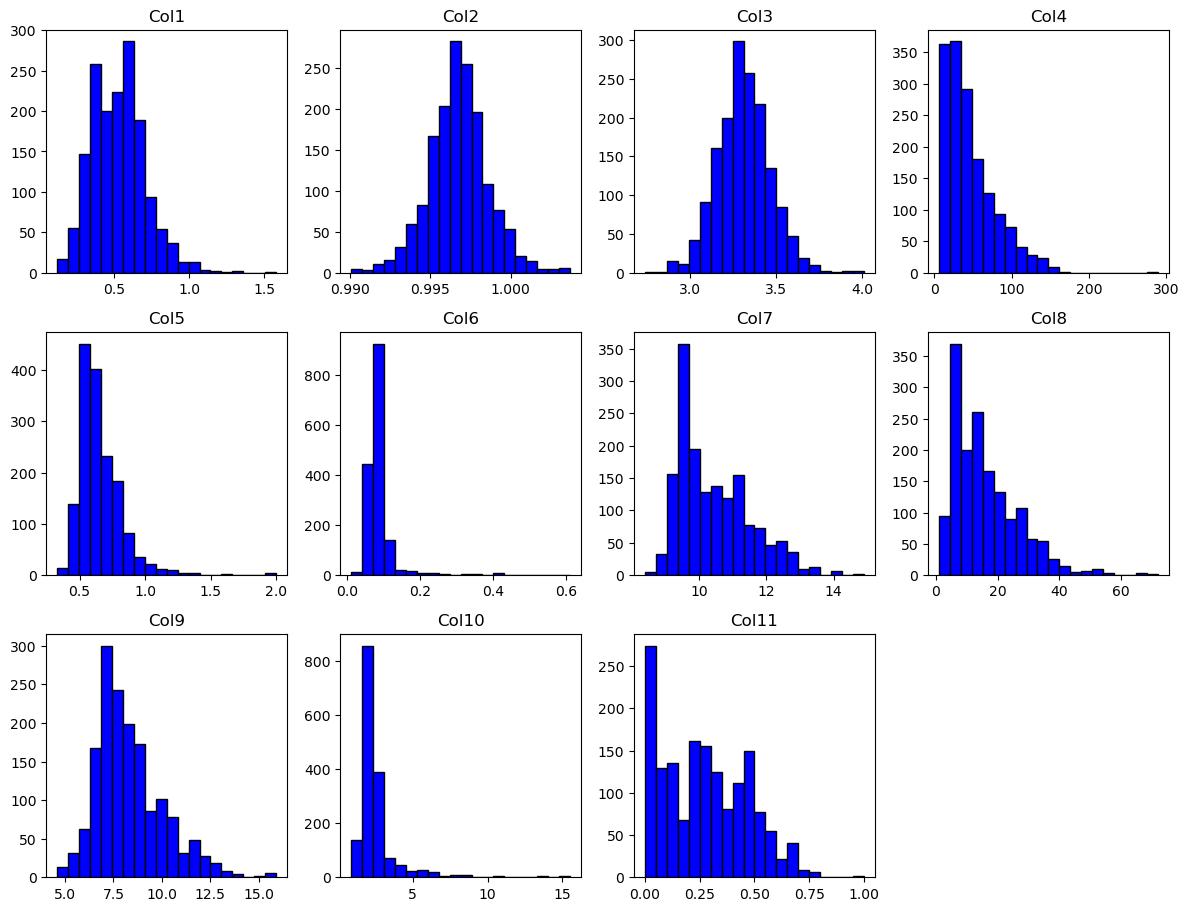

In [313]:
columns = dataset_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,11):
  ax = plt.subplot(4,4,i+1)
  ax.hist(dataset_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

In [315]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [  0   0   0  10  53 681 638 199  18]
Labels counts in y_train: [  0   0   0   8  40 511 478 149  13]
Labels counts in y_test: [  0   0   0   2  13 170 160  50   5]


In [316]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Section 1

In [317]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Misclassification samples: 167
530      True
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002     True
969     False
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.583


# Section 2

In [318]:
# SVM

from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.7, C=30.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Misclassification samples: 167
530      True
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.583


# Section 3

In [319]:
# RANDOM TREES

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

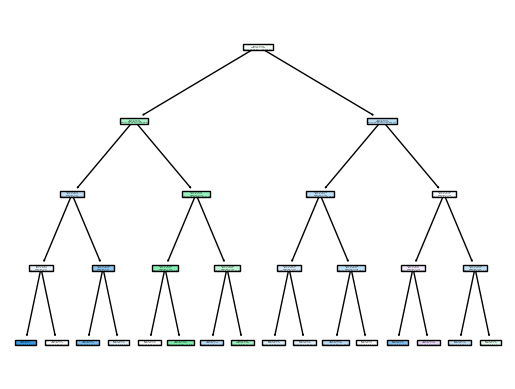

Misclassification samples: 178
530      True
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.555


In [320]:
from sklearn import tree

# TODAS LAS CARACTERÍSTICAS
# feature_names = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11']
# tree.plot_tree(tree_model,
#                feature_names=feature_names,
#                filled=True)

# 4 CARACTERÍSTICAS (1, 5, 7, 11)
# feature_names = ['Col1', 'Col5', 'Col7', 'Col11']
# tree.plot_tree(tree_model,
#                feature_names=feature_names,
#                filled=True)

# 2 CARACTERÍSTICAS
feature_names = ['Col1', 'Col7']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

# Summary

## Converting a Jupyter Notebook to a Python File (script located in the parent directory)

In [321]:
! python ../.convert_notebook_to_script.py --input pr01.ipynb --output pr01.py

[NbConvertApp] Converting notebook pr01.ipynb to script
[NbConvertApp] Writing 6823 bytes to pr01.py


## Converting a Jupyter Notebook to a Python File (script located in the current directory)

In [322]:
! python .convert_notebook_to_script.py --input pr01.ipynb --output pr01.py

[NbConvertApp] Converting notebook pr01.ipynb to script
[NbConvertApp] Writing 6823 bytes to pr01.py
